In [1]:
import random
import warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm
import seaborn as sns # visualization
import matplotlib.pyplot as plt # visualization
from matplotlib.colors import ListedColormap
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler # standardization
from sklearn.model_selection import train_test_split # Split dataset
from sklearn.neighbors import KNeighborsClassifier # KNN Model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB # Naive Bayes Model
from sklearn.metrics import accuracy_score # Accuracy measurements
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
wine = pd.read_csv('/content/sample_data/winequality-red (1).csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
wine.isnull().sum()


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [5]:
wine.shape

(1599, 12)

In [6]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
wine['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


In [8]:
corr = wine.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


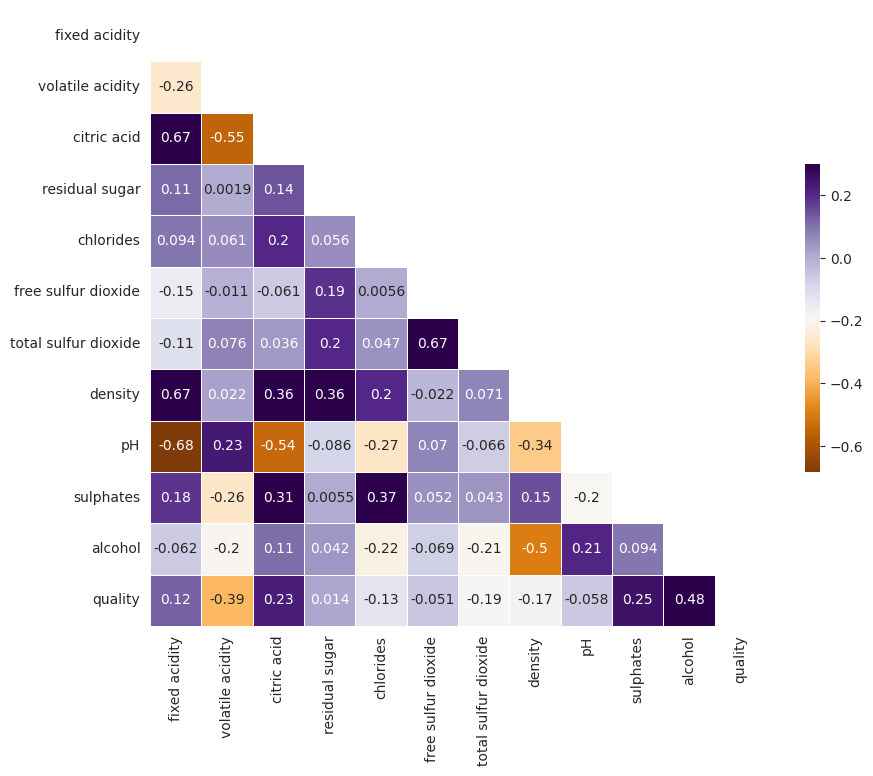

In [9]:
# Heat Map using corelation metrix
# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

with sns.axes_style("white"):
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(10, 8))
    ax = sns.heatmap(corr, cmap='PuOr', mask=mask, vmax=.3, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

Observation:

from here we notice that impact of **'residual sugar'**, **'free sulfur dioxide'** and **'ph'** on **'quality'** is neglisible. So we can drop them. Also we observer that similarity between **'alcohol'** and **'quality'** is maximum.

In [10]:
wine.drop(["residual sugar",'free sulfur dioxide','pH'],axis = 1,inplace = True)
wine.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,5
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,5
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,6
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5


**Univariate Analysis: On Alcohol**

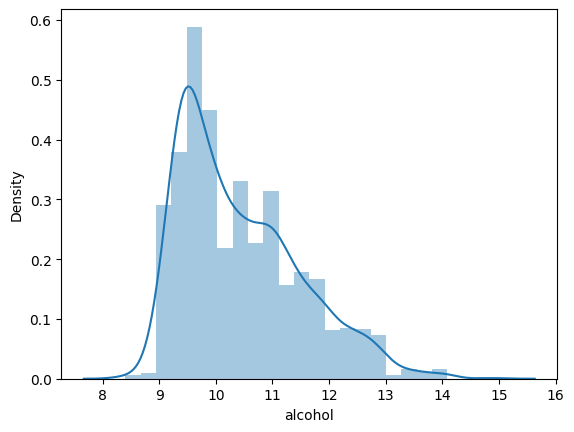

In [12]:
sns.distplot(wine['alcohol'])
plt.show()



**Let's split 'alcohol' into three parts such as, low, median and high.**

In [13]:
bins = [0, 10, 12, 15]
labels = ["low","median","high"]
wine['alcohol_label'] = pd.cut(wine['alcohol'], bins=bins, labels=labels)
wine.drop('alcohol',axis =1, inplace = True)
wine.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,quality,alcohol_label
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,5,low
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,5,low
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,5,low
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,6,low
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,5,low


**pd.cut():** This function is used to segment and sort data values into bins. It cuts the alcohol values into the bins defined by bins.

**wine['alcohol']:** The column in the wine dataset that contains the alcohol content values.
bins=bins: Specifies the bins that the alcohol content should be divided into.

**labels=labels:** Assigns the corresponding labels ("low", "median", "high") to each bin.
The result is a new column in the wine DataFrame called alcohol_label that contains the labels "low", "median", or "high" based on the alcohol content.

--------------------------------------------------------------------------------------------------
**Univariate Analysis: On Quality**

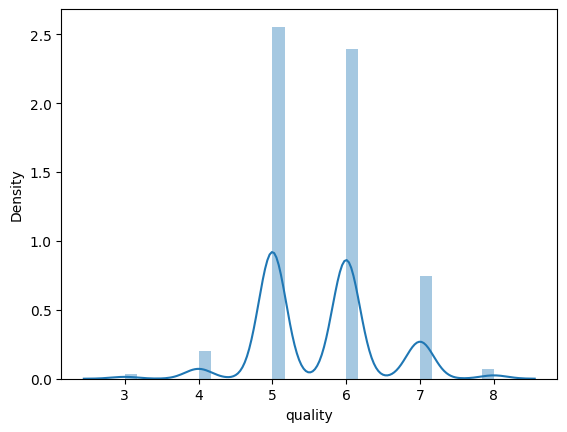

In [14]:
sns.distplot(wine['quality'])
plt.show()

**We can split quality also into three small chuncks such as poor i.e. from 0 to 4, normal i.e. from 5 or 6 and excellent i.e. from 7 to 10.**

In [15]:
bins = [0, 4, 6, 10]
labels = ["poor","normal","excellent"]
wine['quality_label'] = pd.cut(wine['quality'], bins=bins, labels=labels)
wine.drop('quality',axis =1, inplace = True)
wine.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol_label,quality_label
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,low,normal
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,low,normal
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,low,normal
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,low,normal
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,low,normal


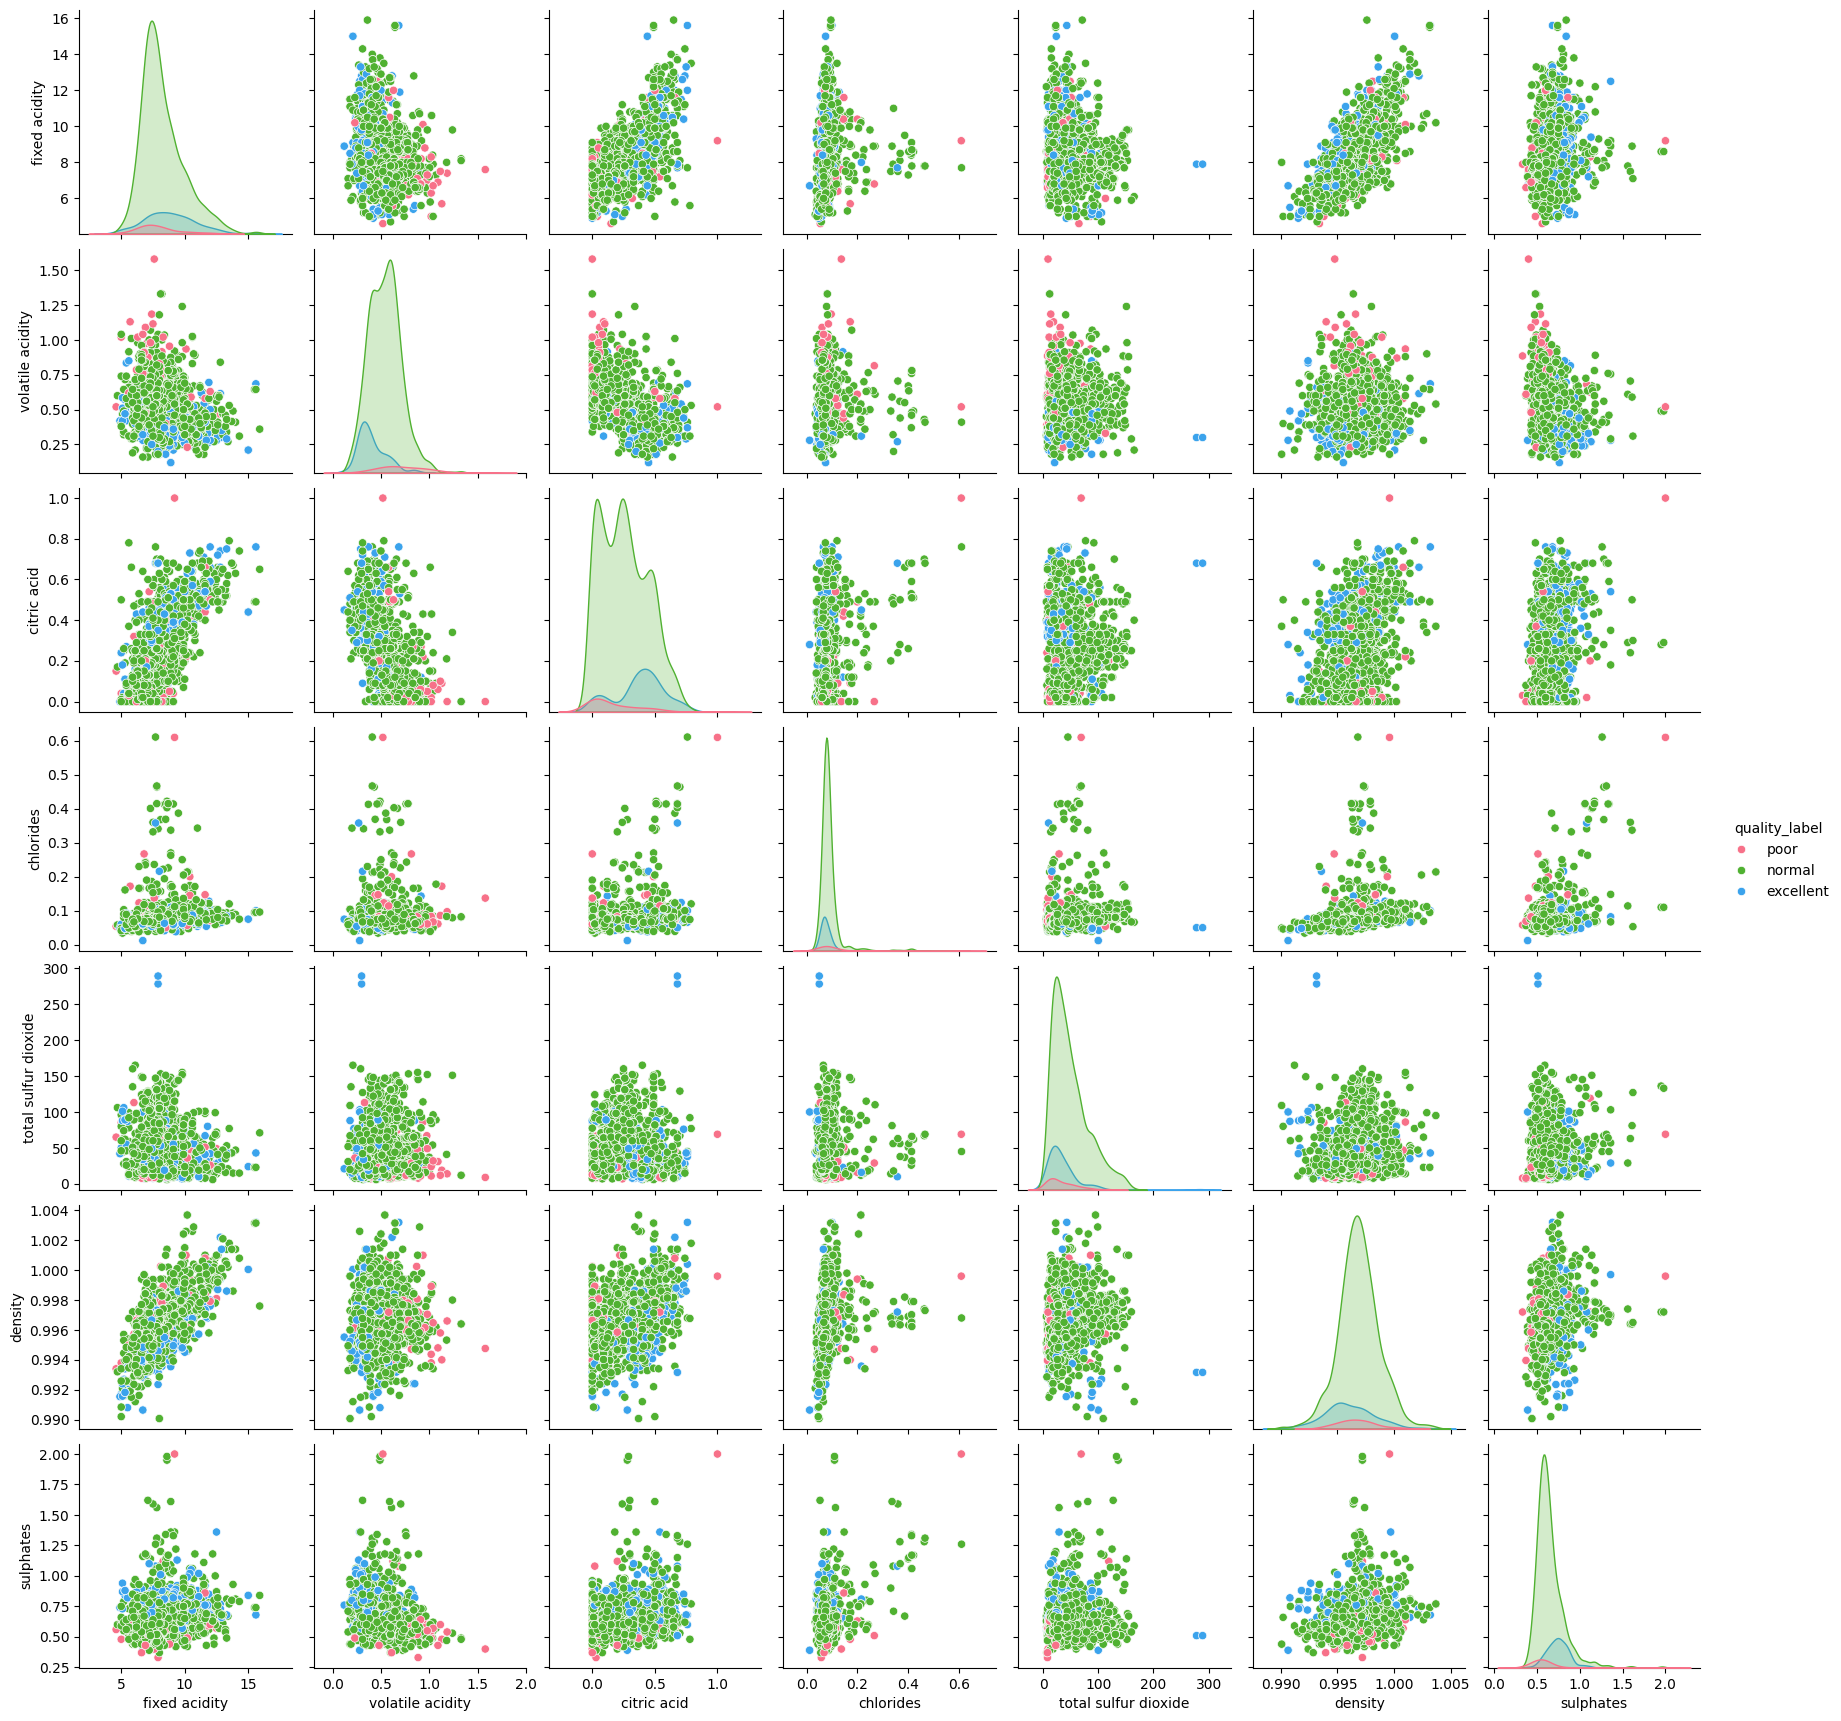

In [17]:
# Multivariate Analysis: Using Pairplots
sns.pairplot(wine, hue="quality_label", palette="husl",diag_kind="kde")
plt.show()

**To betermine wine qulity, volatile acidity and citric acid can be our important features as the overlap of their distributions are vary less in compare to others.**

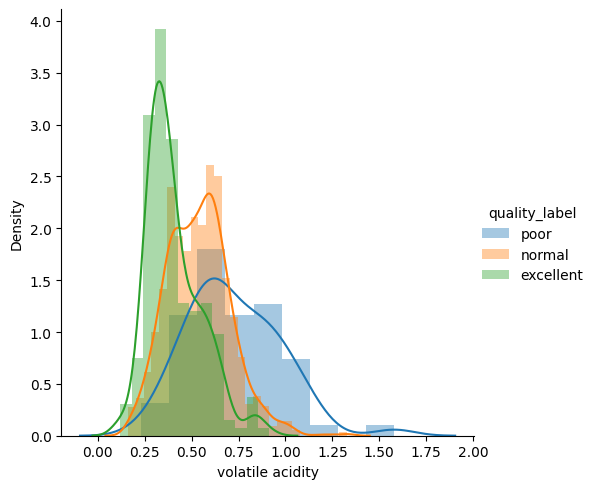

In [18]:
#Analysis On: Volatile Acidity and Citric Acid
sns.FacetGrid(wine,hue='quality_label', height=5).map(sns.distplot,'volatile acidity').add_legend()
plt.show()

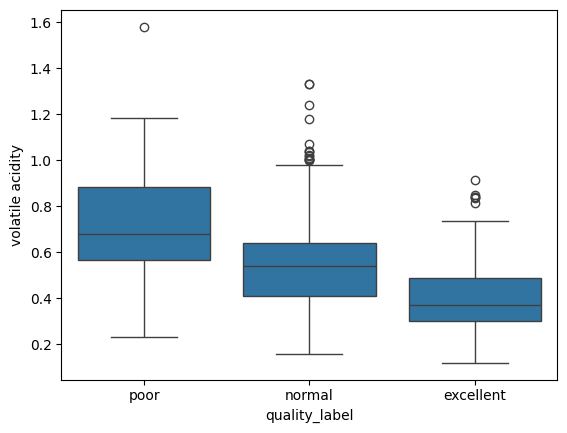

In [19]:
sns.boxplot(x='quality_label',y='volatile acidity', data=wine)
plt.show()



**From this plot we can assure that, More than 50% of our excellent catagory wine have volatile acidity in between 0.3 to 0.5.**

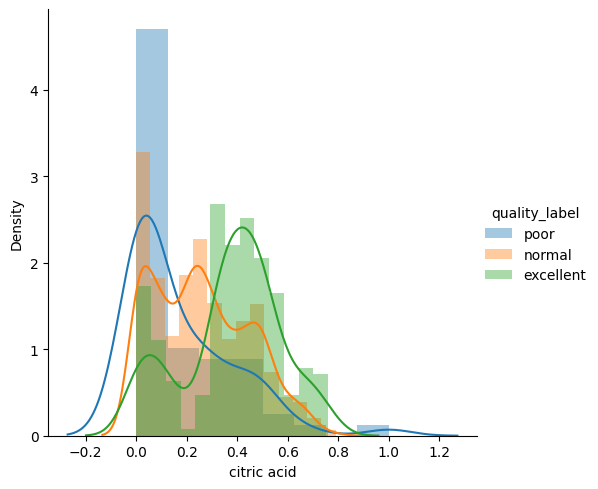

In [20]:
sns.FacetGrid(wine,hue='quality_label', height=5).map(sns.distplot,'citric acid').add_legend()
plt.show()

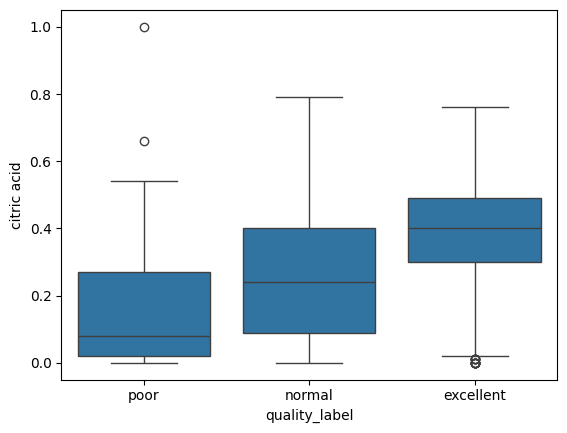

In [22]:
sns.boxplot(x='quality_label', y='citric acid',data=wine)
plt.show()

** Similary from this plot we can say, More than 50% of our excellent catagory wine have citric acid in between 0.3 to 0.5.**

In [23]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1599 non-null   float64 
 1   volatile acidity      1599 non-null   float64 
 2   citric acid           1599 non-null   float64 
 3   chlorides             1599 non-null   float64 
 4   total sulfur dioxide  1599 non-null   float64 
 5   density               1599 non-null   float64 
 6   sulphates             1599 non-null   float64 
 7   alcohol_label         1599 non-null   category
 8   quality_label         1599 non-null   category
dtypes: category(2), float64(7)
memory usage: 91.0 KB


In [24]:
# Convert category values to numeric values by creating dummy featutes.
df_wine = pd.get_dummies(wine, columns=['alcohol_label'], drop_first=True)
df_wine.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,quality_label,alcohol_label_median,alcohol_label_high
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,normal,False,False
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,normal,False,False
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,normal,False,False
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,normal,False,False
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,normal,False,False


**pd.get_dummies():**This function is used to convert categorical variables into a series of binary (0 or 1) columns. Each category in the original variable gets its own column.

In [25]:
result = df_wine['quality_label']
df_wine.drop(['quality_label'], axis=1, inplace=True)
print(df_wine.shape, result.shape)

(1599, 9) (1599,)


In [26]:
# use 70% of the data for training and 30% for testing
X_train, X_test, Y_train, Y_test = train_test_split(df_wine, result, test_size=0.30, random_state=11)

In [27]:
# For KNN our dataset must have to standardised.
# No need standardised quality_label as it is the result column

scaler = StandardScaler()
scaler.fit(df_wine)
scaled_features = scaler.transform(df_wine)
df_wine_sc = pd.DataFrame(scaled_features, columns=df_wine.columns)

In [29]:
# use 70% of the data for training and 30% for testing
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(df_wine_sc, result, test_size=0.30, random_state=11)

In [30]:
# convert dataframe to nd numpy array
X_train_sc = X_train_sc.to_numpy()
y_train_sc = y_train_sc.to_numpy()

In [31]:
def apply_knn(neigh, weight='uniform'):
    knn = KNeighborsClassifier(n_neighbors=neigh, weights=weight)
    knn.fit(X_train_sc,y_train_sc)
    pred_knn = knn.predict(X_test_sc)
    return pred_knn

**apply_knn** is designed to train a k-Nearest Neighbors (KNN) classifier.

**neigh:** Number of neighbors the KNN model should consider.

**weight:** How the neighbors are weighted in the voting process ('uniform' by default, but can be set to 'distance').

In [32]:
pred_knn_for_20 = apply_knn(20)
print('Accuracy of model at K=20 is', accuracy_score(y_test_sc, pred_knn_for_20)) #20 smooths the decision boundary, which can help reduce overfitting

Accuracy of model at K=20 is 0.8229166666666666


In [33]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train_sc, y_train_sc)
pred_lr = clf.predict(X_test_sc)
print('Accuracy of model is', accuracy_score(y_test_sc, pred_lr))

Accuracy of model is 0.8229166666666666


In [38]:
# Apply GridSearchCV to Optomise Parameters
model = KNeighborsClassifier()

params = {'n_neighbors':list(range(1, 50, 2)), 'weights':['uniform', 'distance']}

gs = GridSearchCV(model, params, cv = 5, n_jobs=-1)

gs_results = gs.fit(X_train_sc, y_train_sc)


**GridSearchCV** is a tool in machine learning used to find the best parameters for a model by testing a specified range of values and evaluating their performance.

In [39]:
print('Best Accuracy: ', gs_results.best_score_)
print('Best Parametrs: ', gs_results.best_params_)

Best Accuracy:  0.8471973094170403
Best Parametrs:  {'n_neighbors': 13, 'weights': 'distance'}


In [40]:
best_k = 13
best_weights = 'distance'
pred_knn_for_Best_k = apply_knn(best_k, best_weights)
print('Accuracy of model at K=13 is ', accuracy_score(y_test_sc, pred_knn_for_Best_k))

Accuracy of model at K=13 is  0.875


In [41]:
model = LogisticRegression(max_iter=10000)

params = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4], 'penalty': ['l1', 'l2']}]

gs = GridSearchCV(model, params, cv=5, n_jobs=-1)

gs_results = gs.fit(X_train_sc, y_train_sc)

In [42]:
print('Best Accuracy: ', gs_results.best_score_)
print('Best Parametrs: ', gs_results.best_params_)

Best Accuracy:  0.837359865470852
Best Parametrs:  {'C': 1, 'penalty': 'l2'}


In [43]:
lr = LogisticRegression(C=1, penalty='l2', random_state=0)

lr.fit(X_train_sc, y_train_sc)

pred_lr_for_Best_param = lr.predict(X_test_sc)

print('Accuracy of model at C = 1 and Penalty = l2 is', accuracy_score(y_test_sc, pred_lr_for_Best_param))

Accuracy of model at C = 1 and Penalty = l2 is 0.8229166666666666


In [44]:
knn = KNeighborsClassifier(n_neighbors=13,weights='distance')
scores_knn = cross_val_score(knn, X_train_sc, y_train_sc, cv=10, scoring='accuracy')

In [45]:
print(scores_knn)

[0.83035714 0.85714286 0.88392857 0.76785714 0.84821429 0.83035714
 0.83035714 0.88392857 0.86607143 0.88288288]


In [46]:
print(scores_knn.mean())

0.848109716859717


**conclude that our model's best accuracy is approx 85%**

In [47]:
lr = LogisticRegression(C=1, penalty='l2',random_state=0)
scores_lr = cross_val_score(lr, X_train_sc, y_train_sc, cv=10, scoring='accuracy')

In [48]:
print(scores_lr)

[0.83928571 0.86607143 0.84821429 0.80357143 0.83928571 0.82142857
 0.83928571 0.80357143 0.83035714 0.84684685]


In [49]:
print(scores_lr.mean())

0.8337918275418275


In [50]:
print(pd.DataFrame(y_test_sc)['quality_label'].value_counts())

quality_label
normal       395
excellent     65
poor          20
Name: count, dtype: int64


In [53]:
cm = confusion_matrix(y_test_sc, pred_knn_for_Best_k)

In [54]:
names = ["excellent","normal","poor"]
print(pd.DataFrame(cm, index=names, columns=names))

           excellent  normal  poor
excellent         37      28     0
normal            12     383     0
poor               0      20     0


In [55]:
cm = confusion_matrix(y_test_sc, pred_lr_for_Best_param)

In [56]:
names = ["excellent","normal","poor"]
print(pd.DataFrame(cm, index=names, columns=names))

           excellent  normal  poor
excellent         17      48     0
normal            16     378     1
poor               0      20     0
